# Read me

You can run this file without having to load any external data.

This notebook took about 1.5 hour to run.

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense
from sklearn.model_selection import train_test_split
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


I0000 00:00:1731579118.351370     471 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731579118.453992     471 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731579118.454035     471 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [ ]:

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train, x_temp, y_train, y_temp = train_test_split(x_train_full, y_train_full, test_size=0.2, shuffle=True, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=True, random_state=42)
print("Training data shape:", x_train.shape, y_train.shape)
print("Validation data shape:", x_val.shape, y_val.shape)
print("Test data shape:", x_test.shape, y_test.shape)

class_names_fashion_mnist = [
    'T-shirt/top',  # 0
    'Trouser',      # 1
    'Pullover',     # 2
    'Dress',        # 3
    'Coat',         # 4
    'Sandal',       # 5
    'Shirt',        # 6
    'Sneaker',      # 7
    'Bag',          # 8
    'Ankle boot'    # 9
]

Training data shape: (48000, 28, 28) (48000,)
Validation data shape: (6000, 28, 28) (6000,)
Test data shape: (6000, 28, 28) (6000,)


In [ ]:
def plot_training_history(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_accuracy) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


def test_accuracy(model,x_test,y_test,class_names):
    y_pred_prob= model.predict(x_test)
    y_pred= np.argmax(y_pred_prob, axis=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print(classification_report(y_test, y_pred, target_names=class_names))

<h1>Model taken from the book and used as the baseline approach <h1/>

In [ ]:
cnn_base = keras.models.Sequential([
 keras.layers.Conv2D(64, 7, activation="relu", padding="same",
 input_shape=[28, 28, 1]),
 keras.layers.MaxPooling2D(2),
 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
 keras.layers.MaxPooling2D(2),
 keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
 keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
 keras.layers.MaxPooling2D(2),
 keras.layers.Flatten(),
 keras.layers.Dense(128, activation="relu"),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(64, activation="relu"),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(10, activation="softmax")
])
cnn_base.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
cnn_base.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_106 (Conv2D)             │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_110 (Conv2D)             │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,413,834 (5.39 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn_base=cnn_base.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5549 - loss: 1.2348 - val_accuracy: 0.8437 - val_loss: 0.4144
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8333 - loss: 0.4868 - val_accuracy: 0.8678 - val_loss: 0.3614
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8640 - loss: 0.3955 - val_accuracy: 0.8867 - val_loss: 0.3083
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8813 - loss: 0.3488 - val_accuracy: 0.8963 - val_loss: 0.2937
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8915 - loss: 0.3137 - val_accuracy: 0.8952 - val_loss: 0.2817
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9002 - loss: 0.2869 - val_accuracy: 0.9025 - val_loss: 0.2692
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9035 - loss: 0.2828 - val_accuracy: 0.9095 - val_loss: 0.2574
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9117 - loss: 0.2558 - 

In [ ]:
cnn_base.evaluate(x_test,y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9087 - loss: 0.4306


[0.4049963653087616, 0.906166672706604]

<h1>Model with increasing channels per layer<h1/>

In [ ]:
cnn_channel_increase=keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"),
    keras.layers.Conv2D(128,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(236,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(512,(3,3),activation="relu"),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
cnn_channel_increase.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
cnn_channel_increase.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 236)    │       272,108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 236)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 512)      │     1,088,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,702,390 (6.49 MB)

 Trainable params: 1,702,390 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn_channel_increase=cnn_channel_increase.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7104 - loss: 0.7578 - val_accuracy: 0.8698 - val_loss: 0.3577
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8801 - loss: 0.3169 - val_accuracy: 0.9028 - val_loss: 0.2647
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9062 - loss: 0.2512 - val_accuracy: 0.9093 - val_loss: 0.2578
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9200 - loss: 0.2163 - val_accuracy: 0.9137 - val_loss: 0.2360
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9298 - loss: 0.1834 - val_accuracy: 0.9135 - val_loss: 0.2375
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9431 - loss: 0.1558 - val_accuracy: 0.9167 - val_loss: 0.2330
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9521 - loss: 0.1280 - val_accuracy: 0.9108 - val_loss: 0.2884
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9611 - loss: 0.1044 - 

In [ ]:
cnn_channel_increase.evaluate(x_test,y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.9172 - loss: 0.6148


[0.6053261160850525, 0.9168333411216736]

<h1>Decreasing channel count per layer<h1/>

In [ ]:
cnn_channel_decrease=keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(512,(3,3),activation="relu",padding="same"),
    keras.layers.Conv2D(236,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"),
    keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
cnn_channel_decrease.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
cnn_channel_decrease.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 236)    │     1,087,724 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 236)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 128)    │       272,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 13, 13, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,443,446 (5.51 MB)

 Trainable params: 1,443,446 (5.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn_channel_decrease=cnn_channel_decrease.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6103 - loss: 1.0269 - val_accuracy: 0.8337 - val_loss: 0.4459
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8409 - loss: 0.4399 - val_accuracy: 0.8663 - val_loss: 0.3686
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8731 - loss: 0.3535 - val_accuracy: 0.8782 - val_loss: 0.3285
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8903 - loss: 0.2997 - val_accuracy: 0.8950 - val_loss: 0.2863
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9007 - loss: 0.2725 - val_accuracy: 0.9020 - val_loss: 0.2524
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9071 - loss: 0.2495 - val_accuracy: 0.9053 - val_loss: 0.2545
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9157 - loss: 0.2263 - val_accuracy: 0.9102 - val_loss: 0.2492
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9218 - loss: 0.2105

In [ ]:
cnn_channel_decrease.evaluate(x_test,y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9250 - loss: 0.3655


[0.3793795704841614, 0.9213333129882812]

<h1>Kernel low 1x1 <h1/>

In [ ]:
cnn_kernel_low = keras.models.Sequential([
 keras.layers.Conv2D(64, 7, activation="relu", padding="same",
 input_shape=[28, 28, 1]),
 keras.layers.MaxPooling2D(2),
 keras.layers.Conv2D(128, 1, activation="relu", padding="same"),
 keras.layers.Conv2D(128, 1, activation="relu", padding="same"),
 keras.layers.MaxPooling2D(2),
 keras.layers.Conv2D(256, 1, activation="relu", padding="same"),
 keras.layers.Conv2D(256, 1, activation="relu", padding="same"),
 keras.layers.MaxPooling2D(2),
 keras.layers.Flatten(),
 keras.layers.Dense(128, activation="relu"),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(64, activation="relu"),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(10, activation="softmax")
])
cnn_kernel_low.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
cnn_kernel_low.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 7, 7, 256)      │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 7, 7, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 430,794 (1.64 MB)

 Trainable params: 430,794 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn_kernel_low=cnn_kernel_low.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5826 - loss: 1.1533 - val_accuracy: 0.8130 - val_loss: 0.4807
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7950 - loss: 0.5804 - val_accuracy: 0.8548 - val_loss: 0.3975
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8226 - loss: 0.5054 - val_accuracy: 0.8543 - val_loss: 0.3740
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8334 - loss: 0.4672 - val_accuracy: 0.8583 - val_loss: 0.3787
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8420 - loss: 0.4492 - val_accuracy: 0.8575 - val_loss: 0.3656
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8494 - loss: 0.4250 - val_accuracy: 0.8723 - val_loss: 0.3462
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8517 - loss: 0.4191 - val_accuracy: 0.8730 - val_loss: 0.3427
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8600 - loss: 0.3982 - 

In [ ]:
cnn_kernel_low.evaluate(x_test,y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.8941 - loss: 0.3156


[0.3177447021007538, 0.8911666870117188]

<h1>Kernel high 5x5 <h1/>

In [ ]:
cnn_kernel_high = keras.models.Sequential([
 keras.layers.Conv2D(64, 7, activation="relu", padding="same",
 input_shape=[28, 28, 1]),
 keras.layers.MaxPooling2D(2),
 keras.layers.Conv2D(128, 5, activation="relu", padding="same"),
 keras.layers.Conv2D(128, 5, activation="relu", padding="same"),
 keras.layers.MaxPooling2D(2),
 keras.layers.Conv2D(256, 5, activation="relu", padding="same"),
 keras.layers.Conv2D(256, 5, activation="relu", padding="same"),
 keras.layers.MaxPooling2D(2),
 keras.layers.Flatten(),
 keras.layers.Dense(128, activation="relu"),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(64, activation="relu"),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(10, activation="softmax")
])
cnn_kernel_high.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
cnn_kernel_high.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 14, 14, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 7, 7, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 7, 7, 256)      │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,379,914 (12.89 MB)

 Trainable params: 3,379,914 (12.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn_kernel_high=cnn_kernel_high.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5092 - loss: 1.2894 - val_accuracy: 0.8520 - val_loss: 0.4285
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8354 - loss: 0.4811 - val_accuracy: 0.8757 - val_loss: 0.3395
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8694 - loss: 0.3845 - val_accuracy: 0.8772 - val_loss: 0.3456
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8844 - loss: 0.3450 - val_accuracy: 0.8947 - val_loss: 0.2892
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8956 - loss: 0.3021 - val_accuracy: 0.8985 - val_loss: 0.2824
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9031 - loss: 0.2822 - val_accuracy: 0.9030 - val_loss: 0.2779
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9078 - loss: 0.2660 - val_accuracy: 0.9022 - val_loss: 0.2900
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9134 - loss: 0.2522 - 

In [ ]:
cnn_kernel_high.evaluate(x_test,y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.9104 - loss: 0.4738


[0.42920592427253723, 0.9116666913032532]

<h1>Deep vs shallow network<h1/>

In [ ]:
cnn_deep = keras.models.Sequential([
    keras.layers.Conv2D(24, 7, activation="relu",kernel_initializer="he_normal", padding="same",
    input_shape=[28, 28, 1]),
    keras.layers.Conv2D(24, 3, activation="relu",kernel_initializer="he_normal", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, activation="relu",kernel_initializer="he_normal", padding="same"),
    keras.layers.Conv2D(64, 3, activation="relu",kernel_initializer="he_normal", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu",kernel_initializer="he_normal", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu",kernel_initializer="he_normal", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu",kernel_initializer="he_normal", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu",kernel_initializer="he_normal", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu",kernel_initializer="he_normal", padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(256,kernel_initializer="he_normal", activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128,kernel_initializer="he_normal", activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,kernel_initializer="he_normal", activation="softmax")
])
cnn_deep.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
cnn_deep.summary()
# try residual network

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 24)     │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 24)     │         5,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 14, 14, 64)     │        13,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,935,762 (7.38 MB)

 Trainable params: 1,935,762 (7.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def lr_schedule(epoch):
    initial_lr = 0.1
    decay_rate = 0.5
    decay_step = 10
    return initial_lr * (decay_rate ** (epoch // decay_step))

lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule)

In [ ]:
history_cnn_deep=cnn_deep.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val),callbacks=[lr_scheduler])

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0991 - loss: 220457040.0000 - val_accuracy: 0.1030 - val_loss: 2.3129 - learning_rate: 0.1000
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0996 - loss: 2.3159 - val_accuracy: 0.1015 - val_loss: 2.3170 - learning_rate: 0.1000
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0965 - loss: 2.3166 - val_accuracy: 0.1003 - val_loss: 2.3233 - learning_rate: 0.1000
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0995 - loss: 2.3150 - val_accuracy: 0.0945 - val_loss: 2.3139 - learning_rate: 0.1000
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0991 - loss: 2.3147 - val_accuracy: 0.0980 - val_loss: 2.3107 - learning_rate: 0.1000
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1019 - loss: 2.3148 - val_accuracy: 0.1038 - val_loss: 2.3101 - learning_rate: 0.1000
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.

In [ ]:
cnn_deep.evaluate(x_test,y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.0967 - loss: 2.3059


[2.3052074909210205, 0.10016666352748871]

<h1>Residual network implementation<h1/>

In [ ]:
import keras
from keras import layers

# Residual Block definition with 1x1 convolution for matching dimensions
def residual_block(x, filters, kernel_size=3):
    # Shortcut connection (input)
    shortcut = x

    # First convolution in the block
    x = layers.Conv2D(filters, kernel_size, activation="relu", kernel_initializer="he_normal", padding="same")(x)

    # Second convolution in the block
    x = layers.Conv2D(filters, kernel_size, activation=None, kernel_initializer="he_normal", padding="same")(x)

    # If the number of filters of the shortcut doesn't match the output, use a 1x1 convolution
    if x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, 1, kernel_initializer="he_normal", padding="same")(shortcut)

    # Add the shortcut connection to the output of convolutions
    x = layers.add([x, shortcut])

    # ReLU activation after the residual addition
    x = layers.Activation("relu")(x)

    return x

# Build the model with residual blocks
inputs = layers.Input(shape=[28, 28, 1])

x = layers.Conv2D(24, 7, activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
x = layers.Conv2D(24, 3, activation="relu", kernel_initializer="he_normal", padding="same")(x)
x = layers.MaxPooling2D(2)(x)

# First residual block
x = residual_block(x, filters=64)

# Second residual block
x = residual_block(x, filters=64)

x = layers.MaxPooling2D(2)(x)

# Third residual block
x = residual_block(x, filters=128)

# Fourth residual block
x = residual_block(x, filters=128)

# Fifth residual block
x = residual_block(x, filters=128)

x = layers.MaxPooling2D(2)(x)

# Sixth residual block
x = residual_block(x, filters=256)

# Seventh residual block
x = residual_block(x, filters=256)

# Flatten and fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(256, kernel_initializer="he_normal", activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, kernel_initializer="he_normal", activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(10, kernel_initializer="he_normal", activation="softmax")(x)

cnn_deep_resnet = keras.models.Model(inputs=inputs, outputs=x)

cnn_deep_resnet.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

cnn_deep_resnet.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 28, 28,    │      1,200 │ input_layer_6[0]… │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 28, 28,    │      5,208 │ conv2d_32[0][0]   │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 14, 14,    │          0 │ conv2d_33[0][0]   │
│ (MaxPooling2D)      │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 14, 14,    │     13,888 │ max_pooling2d_15… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 14, 14,    │     36,928 │ conv2d_34[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 14, 14,    │      1,600 │ max_pooling2d_15… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 14, 14,    │          0 │ conv2d_35[0][0],  │
│                     │ 64)               │            │ conv2d_36[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 14, 14,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 14, 14,    │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 14, 14,    │     36,928 │ conv2d_37[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 14, 14,    │          0 │ conv2d_38[0][0],  │
│                     │ 64)               │            │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 14, 14,    │          0 │ add_1[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 7, 7, 64)  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 7, 7, 128) │     73,856 │ max_pooling2d_16… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 7, 7, 128) │    147,584 │ conv2d_39[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 7, 7, 128) │      8,320 │ max_pooling2d_16… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 7, 7, 128) │          0 │ conv2d_40[0][0],

 Total params: 3,675,474 (14.02 MB)

 Trainable params: 3,675,474 (14.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn_deep_resnet=cnn_deep_resnet.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6169 - loss: 1.2506 - val_accuracy: 0.8540 - val_loss: 0.4363
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8530 - loss: 0.4310 - val_accuracy: 0.8740 - val_loss: 0.3366
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8719 - loss: 0.3689 - val_accuracy: 0.8685 - val_loss: 0.3576
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8839 - loss: 0.3306 - val_accuracy: 0.8780 - val_loss: 0.3260
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8926 - loss: 0.3074 - val_accuracy: 0.8883 - val_loss: 0.3074
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8948 - loss: 0.2950 - val_accuracy: 0.8912 - val_loss: 0.3116
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9021 - loss: 0.2821 - val_accuracy: 0.8975 - val_loss: 0.3034
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9061 - loss: 0.2645 -

In [ ]:
cnn_deep_resnet.evaluate(x_test,y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8867 - loss: 0.3232


[0.33909425139427185, 0.8848333358764648]

<h1>Shallow network<h1/>

In [ ]:
cnn_shallow = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu",kernel_initializer="he_normal", padding="same",
    input_shape=[28, 28, 1]),
    keras.layers.Conv2D(128, 3, activation="relu",kernel_initializer="he_normal", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100,kernel_initializer="he_normal", activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,kernel_initializer="he_normal", activation="softmax")
])
cnn_shallow.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
cnn_shallow.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │     2,508,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,966 (9.87 MB)

 Trainable params: 2,586,966 (9.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn_shallow=cnn_shallow.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7608 - loss: 0.7388 - val_accuracy: 0.8943 - val_loss: 0.2912
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8813 - loss: 0.3342 - val_accuracy: 0.9065 - val_loss: 0.2569
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8998 - loss: 0.2748 - val_accuracy: 0.9108 - val_loss: 0.2387
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9134 - loss: 0.2359 - val_accuracy: 0.9168 - val_loss: 0.2319
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9231 - loss: 0.2090 - val_accuracy: 0.9183 - val_loss: 0.2412
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9346 - loss: 0.1775 - val_accuracy: 0.9238 - val_loss: 0.2309
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9411 - loss: 0.1567 - val_accuracy: 0.9257 - val_loss: 0.2279
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9478 - loss: 0.1413 - 

In [ ]:
cnn_shallow.evaluate(x_test,y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.9189 - loss: 0.4729


[0.4710278809070587, 0.9228333234786987]

In [ ]:
import tensorflow as tf
from tensorflow import keras

cnn_global_pool = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

cnn_global_pool.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])
cnn_global_pool.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)              │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,151,690 (4.39 MB)

 Trainable params: 1,151,690 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn_global_pool=cnn_global_pool.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4689 - loss: 1.3713 - val_accuracy: 0.8157 - val_loss: 0.4998
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8195 - loss: 0.5108 - val_accuracy: 0.8710 - val_loss: 0.3478
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8626 - loss: 0.3954 - val_accuracy: 0.8788 - val_loss: 0.3244
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8840 - loss: 0.3389 - val_accuracy: 0.8858 - val_loss: 0.2975
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8912 - loss: 0.3140 - val_accuracy: 0.9010 - val_loss: 0.2614
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9003 - loss: 0.2821 - val_accuracy: 0.8972 - val_loss: 0.2904
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9088 - loss: 0.2636 - val_accuracy: 0.9097 - val_loss: 0.2521
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9130 - loss: 0.2496 - 

In [ ]:
cnn_global_pool.evaluate(x_test,y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.9048 - loss: 0.4806


[0.46811291575431824, 0.9018333554267883]

In [ ]:
cnn_average_pool = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.AveragePooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.AveragePooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.AveragePooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

cnn_average_pool.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
cnn_average_pool.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)              │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 7, 7, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 3, 3, 256)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,413,834 (5.39 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn_average_pool=cnn_average_pool.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5409 - loss: 1.2226 - val_accuracy: 0.8267 - val_loss: 0.4510
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8181 - loss: 0.5200 - val_accuracy: 0.8737 - val_loss: 0.3606
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8582 - loss: 0.4127 - val_accuracy: 0.8920 - val_loss: 0.3033
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8755 - loss: 0.3638 - val_accuracy: 0.8957 - val_loss: 0.2851
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8856 - loss: 0.3311 - val_accuracy: 0.9028 - val_loss: 0.2735
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8950 - loss: 0.2979 - val_accuracy: 0.9087 - val_loss: 0.2624
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9068 - loss: 0.2720 - val_accuracy: 0.9080 - val_loss: 0.2610
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9146 - loss: 0.2506 - 

In [ ]:
cnn_average_pool.evaluate(x_test,y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.9048 - loss: 0.4642


[0.445655882358551, 0.9054999947547913]

In [ ]:
cnn_low_param = keras.models.Sequential([
    keras.layers.Conv2D(1, 3, activation="relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
cnn_low_param.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
cnn_low_param.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_105 (Conv2D)             │ (None, 28, 28, 1)      │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,852 (30.67 KB)

 Trainable params: 7,852 (30.67 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn_low_param=cnn_low_param.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1027 - loss: 2.3027 - val_accuracy: 0.0985 - val_loss: 2.3027
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.0997 - loss: 2.3027 - val_accuracy: 0.0985 - val_loss: 2.3028
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.1020 - val_loss: 2.3026
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1017 - loss: 2.3027 - val_accuracy: 0.0985 - val_loss: 2.3028
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.0988 - loss: 2.3027 - val_accuracy: 0.0992 - val_loss: 2.3026
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.1016 - loss: 2.3027 - val_accuracy: 0.1038 - val_loss: 2.3026
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.1037 - loss: 2.3026 - val_accuracy: 0.0992 - val_loss: 2.3029
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.0975 - los

In [ ]:
cnn_high_param = keras.models.Sequential([
 keras.layers.Conv2D(128, 7, activation="relu", padding="same",
 input_shape=[28, 28, 1]),
 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
 keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
 keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
 keras.layers.MaxPooling2D(2),
 keras.layers.Flatten(),
 keras.layers.Dense(128, activation="relu"),
 keras.layers.Dense(64, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])
cnn_high_param.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
cnn_high_param.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_99 (Conv2D)              │ (None, 28, 28, 128)    │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,618,378 (29.06 MB)

 Trainable params: 7,618,378 (29.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_cnn_high_param=cnn_high_param.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7918 - loss: 0.5834 - val_accuracy: 0.9040 - val_loss: 0.2693
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9058 - loss: 0.2525 - val_accuracy: 0.9125 - val_loss: 0.2433
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9259 - loss: 0.1994 - val_accuracy: 0.9205 - val_loss: 0.2322
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9402 - loss: 0.1588 - val_accuracy: 0.9220 - val_loss: 0.2310
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9573 - loss: 0.1171 - val_accuracy: 0.9148 - val_loss: 0.2613
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9700 - loss: 0.0827 - val_accuracy: 0.9162 - val_loss: 0.2613
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9770 - loss: 0.0635 - val_accuracy: 0.9230 - val_loss: 0.2724
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9827 - loss: 0

In [ ]:
model_names = [
    'cnn_base', 'cnn_channel_increase', 'cnn_channel_decrease',
    'cnn_kernel_low', 'cnn_kernel_high',
    'cnn_deep_resnet', 'cnn_shallow', 'cnn_global_pool','cnn_low_param',
    'cnn_high_param'
]

# List of history objects based on the naming convention
history_names = [globals()[f"history_{model_name}"] for model_name in model_names]
print(model_names,history_names)

['cnn_base', 'cnn_channel_increase', 'cnn_channel_decrease', 'cnn_kernel_low', 'cnn_kernel_high', 'cnn_deep_resnet', 'cnn_shallow', 'cnn_global_pool', 'cnn_low_param', 'cnn_high_param'] [<keras.src.callbacks.history.History object at 0x7fcc832ab710>, <keras.src.callbacks.history.History object at 0x7fcde5beec00>, <keras.src.callbacks.history.History object at 0x7fcd6c12c860>, <keras.src.callbacks.history.History object at 0x7fcd503d5400>, <keras.src.callbacks.history.History object at 0x7fcd40503410>, <keras.src.callbacks.history.History object at 0x7fcd1c29e270>, <keras.src.callbacks.history.History object at 0x7fce27f82240>, <keras.src.callbacks.history.History object at 0x7fccbc20ad50>, <keras.src.callbacks.history.History object at 0x7fcca11a37d0>, <keras.src.callbacks.history.History object at 0x7fcca03fe390>]


In [ ]:
def get_model_info(model_names, X_test, y_test):
    model_info = {}

    for model_name in model_names:
        # Get the model from the globals
        model = globals()[model_name]

        # Evaluate model on the test set
        test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

        # Get the model's parameter count
        param_count = model.count_params()

        # Store the model's data as a tuple
        model_info[model_name] = (test_loss, test_accuracy, param_count)

    return model_info
plot_info= get_model_info(model_names,x_test,y_test)
print(plot_info)

{'cnn_base': (0.4049963653087616, 0.906166672706604, 1413834), 'cnn_channel_increase': (0.6053261160850525, 0.9168333411216736, 1702390), 'cnn_channel_decrease': (0.3793795704841614, 0.9213333129882812, 1443446), 'cnn_kernel_low': (0.3177447021007538, 0.8911666870117188, 430794), 'cnn_kernel_high': (0.42920592427253723, 0.9116666913032532, 3379914), 'cnn_deep_resnet': (0.33909425139427185, 0.8848333358764648, 3675474), 'cnn_shallow': (0.4710278809070587, 0.9228333234786987, 2586966), 'cnn_global_pool': (0.46811291575431824, 0.9018333554267883, 1151690), 'cnn_low_param': (2.3030362129211426, 0.09466666728258133, 7852), 'cnn_high_param': (0.725304365158081, 0.9116666913032532, 7618378)}


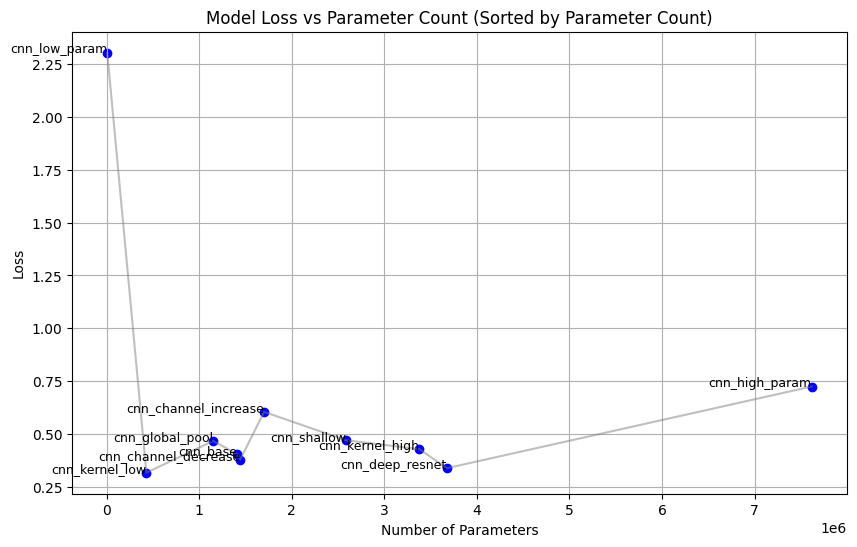

In [ ]:

# Extracting loss values, parameter count, and model names from plot_info
loss_values = [info[0] for info in plot_info.values()]
param_counts = [info[2] for info in plot_info.values()]
model_names = list(plot_info.keys())

# Sort the models by parameter count (ascending order)
sorted_indices = sorted(range(len(param_counts)), key=lambda i: param_counts[i])

# Reorder the data based on the sorted parameter counts
sorted_loss_values = [loss_values[i] for i in sorted_indices]
sorted_param_counts = [param_counts[i] for i in sorted_indices]
sorted_model_names = [model_names[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(sorted_param_counts, sorted_loss_values, color='b')  # Scatter plot for the points

# Connect the dots with lines (now ordered by parameter count)
plt.plot(sorted_param_counts, sorted_loss_values, color='gray', linestyle='-', alpha=0.5)

# Automatically label each point with the model name
for i, model_name in enumerate(sorted_model_names):
    plt.text(sorted_param_counts[i], sorted_loss_values[i], model_name, fontsize=9, ha='right')

plt.xlabel('Number of Parameters')
plt.ylabel('Loss')
plt.title('Model Loss vs Parameter Count (Sorted by Parameter Count)')
plt.grid(True)
plt.show()

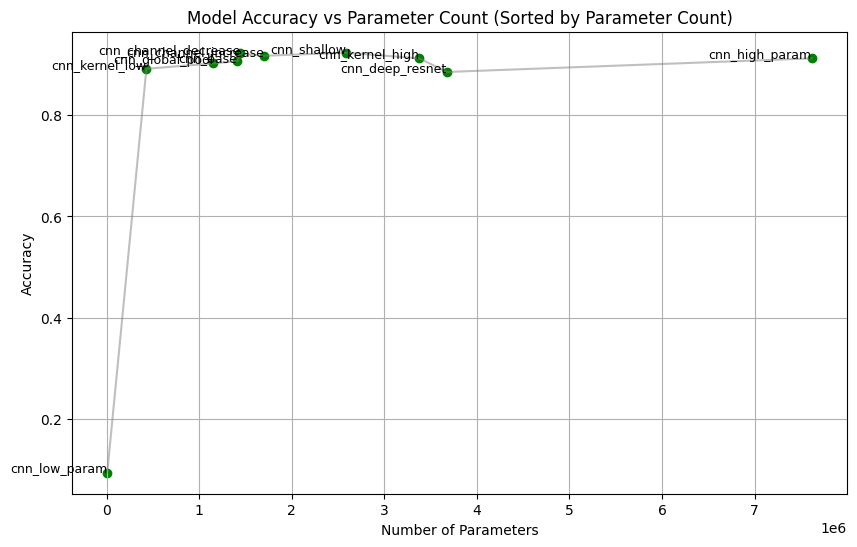

In [ ]:
# Extracting accuracy values, parameter count, and model names from plot_info
accuracy_values = [info[1] for info in plot_info.values()]
param_counts = [info[2] for info in plot_info.values()]
model_names = list(plot_info.keys())

# Sort the models by parameter count (ascending order)
sorted_indices = sorted(range(len(param_counts)), key=lambda i: param_counts[i])

# Reorder the data based on the sorted parameter counts
sorted_accuracy_values = [accuracy_values[i] for i in sorted_indices]
sorted_param_counts = [param_counts[i] for i in sorted_indices]
sorted_model_names = [model_names[i] for i in sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(sorted_param_counts, sorted_accuracy_values, color='g')  # Scatter plot for the points

# Connect the dots with lines (now ordered by parameter count)
plt.plot(sorted_param_counts, sorted_accuracy_values, color='gray', linestyle='-', alpha=0.5)

# Automatically label each point with the model name
for i, model_name in enumerate(sorted_model_names):
    plt.text(sorted_param_counts[i], sorted_accuracy_values[i], model_name, fontsize=9, ha='right')

plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Parameter Count (Sorted by Parameter Count)')
plt.grid(True)
plt.show()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)              │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 14, 14, 10)     │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,346 (306.04 KB)

 Trainable params: 78,346 (306.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
top_3_models = sorted(plot_info.items(), key=lambda x: x[1][1], reverse=True)[:3]

# Display the top 3 models and their details
for model_name, (test_loss, test_accuracy, param_count) in top_3_models:
    print(f"Model: {model_name}, Accuracy: {test_accuracy:.4f}, Loss: {test_loss:.4f}, Parameters: {param_count}")

Model: cnn_shallow, Accuracy: 0.9228, Loss: 0.4710, Parameters: 2586966
Model: cnn_channel_decrease, Accuracy: 0.9213, Loss: 0.3794, Parameters: 1443446
Model: cnn_channel_increase, Accuracy: 0.9168, Loss: 0.6053, Parameters: 1702390


In [ ]:
def plot_training_history(history):
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_accuracy) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_val = x_train[:10000]
y_val = y_train[:10000]
x_train_final = x_train[10000:]
y_train_final = y_train[10000:]
# cnn on cifar
print(
x_train.shape,
x_val.shape,
x_test.shape,
y_train.shape,
y_val.shape,
y_test.shape)
class_names_cifar = [
    'Airplane',    # 0
    'Automobile',  # 1
    'Bird',        # 2
    'Cat',         # 3
    'Deer',        # 4
    'Dog',         # 5
    'Frog',        # 6
    'Horse',       # 7
    'Ship',        # 8
    'Truck'        # 9
]

(50000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1) (10000, 1)


In [ ]:
cnn_shallow = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu",kernel_initializer="he_normal", padding="same",
    input_shape=[32, 32, 3]),
    keras.layers.Conv2D(128, 3, activation="relu",kernel_initializer="he_normal", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100,kernel_initializer="he_normal", activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,kernel_initializer="he_normal", activation="softmax")
])
cnn_shallow.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
cnn_shallow.summary()
history_cnn_shallow=cnn_shallow.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))


/home/user/environments/gpuenvlinux/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731579155.381781     471 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731579155.381844     471 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731579155.381860     471 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731579155.549623     47

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     3,276,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,361,238 (12.82 MB)

 Trainable params: 3,361,238 (12.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


I0000 00:00:1731579157.338872    1336 service.cc:146] XLA service 0x7fa528017cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731579157.338899    1336 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9


 137/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1583 - loss: 3.0156

I0000 00:00:1731579158.799973    1336 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2833 - loss: 2.0463 - val_accuracy: 0.5353 - val_loss: 1.3618
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4376 - loss: 1.5284 - val_accuracy: 0.5932 - val_loss: 1.1612
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4966 - loss: 1.3727 - val_accuracy: 0.6370 - val_loss: 1.0351
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.5380 - loss: 1.2655 - val_accuracy: 0.6764 - val_loss: 0.9327
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5678 - loss: 1.1924 - val_accuracy: 0.7155 - val_loss: 0.8297
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5982 - loss: 1.0983 - val_accuracy: 0.7373 - val_loss: 0.7624
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6231 - loss: 1.0352 - val_accuracy: 0.7626 - val_loss: 0.7249
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6362 - loss: 0.9889 - val_accur

In [ ]:
cnn_shallow.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.6779 - loss: 1.4903


[1.500359058380127, 0.6779999732971191]

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 236)    │       272,108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 236)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 512)      │     1,088,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,703,542 (6.50 MB)

 Trainable params: 1,703,542 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3118 - loss: 1.8072 - val_accuracy: 0.5540 - val_loss: 1.2416
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5981 - loss: 1.1144 - val_accuracy: 0.6981 - val_loss: 0.8610
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7006 - loss: 0.8424 - val_accuracy: 0.7546 - val_loss: 0.6962
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7563 - loss: 0.6930 - val_accuracy: 0.7983 - val_loss: 0.5774
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7936 - loss: 0.5848 - val_accuracy: 0.8263 - val_loss: 0.4891
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8265 - loss: 0.4947 - val_accuracy: 0.8544 - val_loss: 0.4273
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8501 - loss: 0.4284 - val_accuracy: 0.8851 - val_loss: 0.3485
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8735 - loss: 0.3625 -

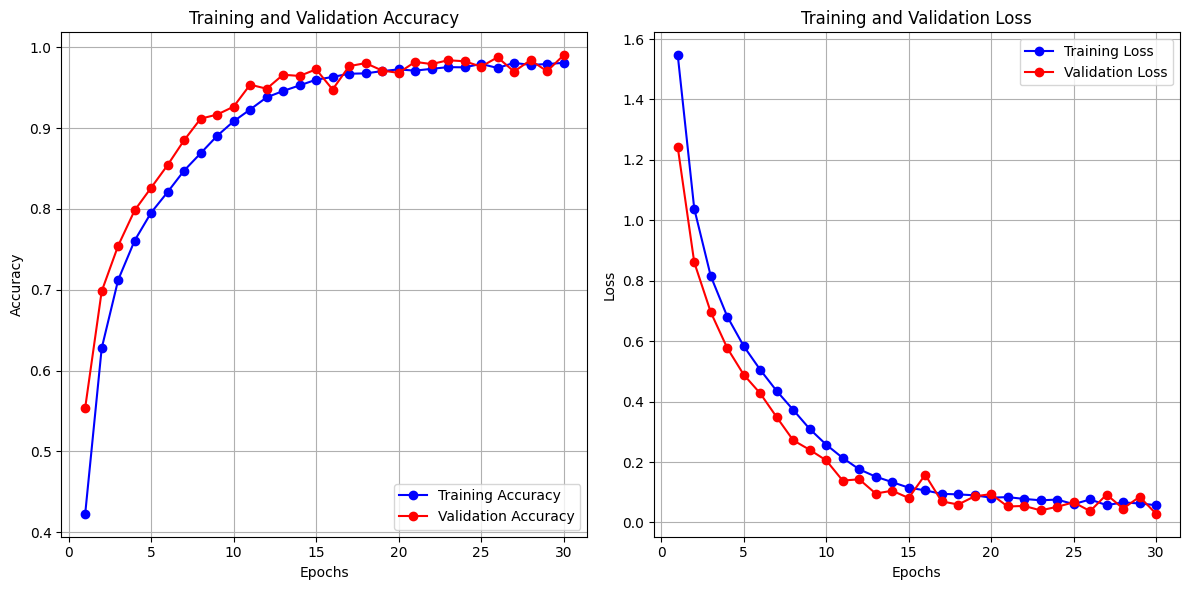

In [ ]:
cnn_channel_increase=keras.models.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"),
    keras.layers.Conv2D(128,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(236,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(512,(3,3),activation="relu"),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
cnn_channel_increase.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
cnn_channel_increase.summary()
history_cnn_channel_increase=cnn_channel_increase.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))
plot_training_history(history_cnn_channel_increase)

In [ ]:
cnn_channel_increase.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.7892 - loss: 1.4186


[1.4666774272918701, 0.7843999862670898]

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 512)    │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 236)    │     1,087,724 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 236)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 15, 15, 128)    │       272,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 15, 15, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,452,662 (5.54 MB)

 Trainable params: 1,452,662 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.2485 - loss: 1.9761 - val_accuracy: 0.4729 - val_loss: 1.4305
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4892 - loss: 1.3910 - val_accuracy: 0.5727 - val_loss: 1.1720
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5837 - loss: 1.1564 - val_accuracy: 0.6160 - val_loss: 1.0817
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6376 - loss: 1.0152 - val_accuracy: 0.6778 - val_loss: 0.9101
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6754 - loss: 0.9233 - val_accuracy: 0.7081 - val_loss: 0.8301
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7053 - loss: 0.8398 - val_accuracy: 0.7429 - val_loss: 0.7362
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7262 - loss: 0.7766 - val_accuracy: 0.7261 - val_loss: 0.7621
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7462 - loss: 

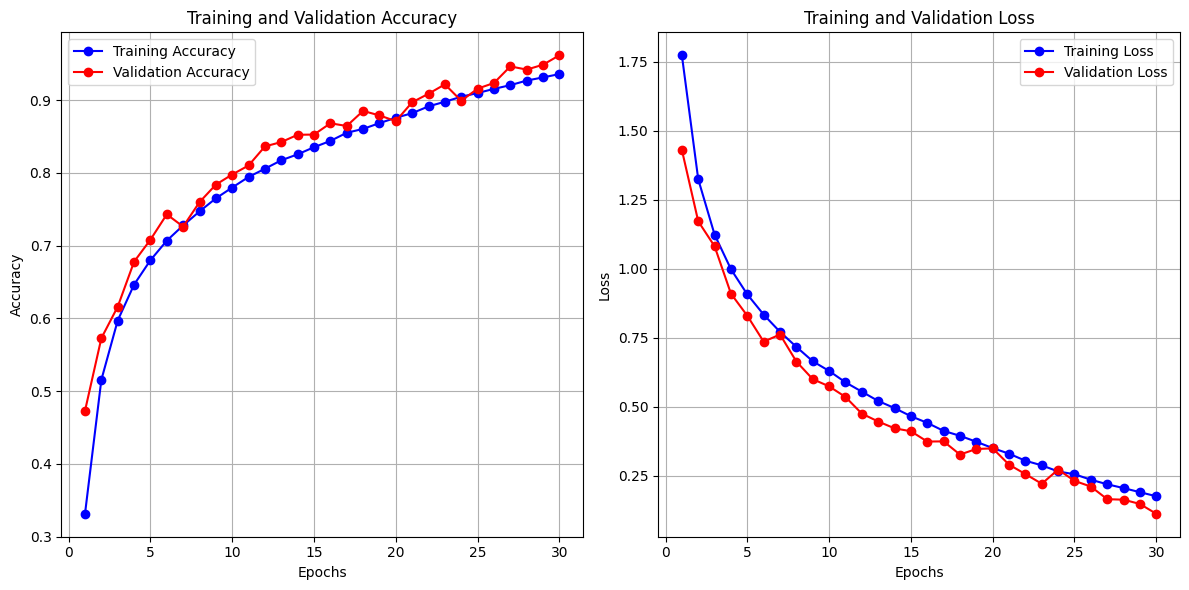

In [ ]:
cnn_channel_decrease=keras.models.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(512,(3,3),activation="relu",padding="same"),
    keras.layers.Conv2D(236,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"),
    keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
cnn_channel_decrease.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
cnn_channel_decrease.summary()
history_cnn_channel_decrease=cnn_channel_decrease.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))
plot_training_history(history_cnn_channel_decrease)

In [ ]:
cnn_channel_decrease.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7908 - loss: 0.7979


[0.8195523619651794, 0.789900004863739]